# Header

In [ ]:
import numpy as np
import healpy as hp
import os, sys
from astropy.io import fits
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec

nside = 2048
lmax = 2048
ll = np.arange(0,lmax,1)
scale_ps = ll*(ll+1)/(2*np.pi)

psl = r'$\frac{l(l+1)}{2\pi}C_l \/ [\mu K^2]$'

# Choose your dataset

In [7]:
from lerepi.data.dc08 import data_08d as sims_if
from lerepi.params.s08 import s08d as parfile
from lerepi.survey_config.dc08 import sc_08d as sc

sims_lerepi = sims_if.ILC_May2022('00')

could not setup healpix hack. reverting to standard healpy
inside cinv_p: nside=2048, 2048


In [13]:
from plancklens.utils import alm2rlm, rlm2alm, clhash
from itercurv.remapping import cachers
import os

def load_plms(lib_dir, simid, it):
    lib_dir = os.path.abspath(lib_dir)
    cacher = cachers.cacher_npy(lib_dir)
    itmax = it
    pth = os.path.join(lib_dir, 'phi_plm_it000')
    sk_fname = lambda k: os.path.join(lib_dir, 'hessian', 'rlm_sn_%s_%s' % (k, 'p'))
    print(pth)
    rlm = alm2rlm(cacher.load(pth))
    ret = [] if 0 != it else [rlm2alm(rlm)]
    for i in range(itmax):
        if cacher.is_cached(sk_fname(i)):
            rlm += cacher.load(sk_fname(i))
            if (i + 1) == it:
                ret.append(rlm2alm(rlm))
                print(it, ' appended')
        else:
            print("*** Could only build up to itr number %s"%i)
            return ret
    return ret
plm = load_plms(parfile.TEMP + '/iterator_p_p_%04d_OBD'%0, 0, 0)

/global/cscratch1/sd/sebibel/cmbs4/s08d/cILC_00_test/iterator_p_p_0000_OBD/phi_plm_it000


In [21]:
import healpy as hp
pmap = hp.alm2map(plm[0], nside=2048)

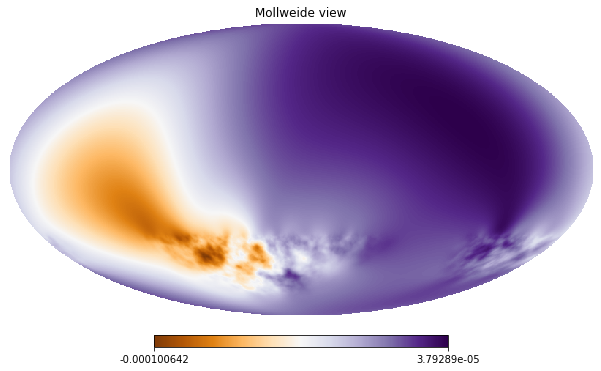

In [22]:
hp.mollview(pmap, cmap='PuOr')